In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

__pycache__
~$CS7015.docx
~$Doc1.docx
1. Transfer learning results analysis.ipynb
1. Transfer learning.py
1.1_No_pretrain_large_224.csv
1.1_No_pretrain_large_32.csv
1.2_pretrain_large_224.csv
1.2_pretrain_large_32.csv
2.1 and 2.2 Data augmentation.py
2.1_2.2_tiny_224_aug.csv
2.1_No_pretrain_32_tiny_aug_1.csv
2.1_No_pretrain_32_tiny_aug_2.csv
2.1_No_pretrain_32_tiny_aug_3.csv
2.3 Dropout.py
2.3_tiny_224_DO.csv
Assignment 1
Assignment 2
Assignment 3
Assn2.docx
CS7015.docx
csv_results
data
models
runs
train_test_1.png
train_test_2.png
transforms tried.txt


### Pick 1.1 csv results file for 32x32 or 224x224

In [37]:
data = pd.read_csv("1.1_No_pretrain_large_224.csv")
# data = pd.read_csv("1.1_No_pretrain_large_32.csv")

In [38]:
data['overfit%'] = 100*(data['train_accuracy'] - data['test_accuracy'])
data['overfit%'] = data['overfit%'].apply(lambda x: max(x, 0))

data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head(5)

,run,epoch,loss,train_accuracy,epoch duration,run duration,test_accuracy,total parameters,lr,batch_size,momentum,weight_decay,pretrained,overfit%
0,1,1,1.448762,0.47418,460.524298,463.132570,0.6184,11181642,0.01,32,0.9,0.001,[False],0.000
1,1,2,0.863842,0.69638,461.061224,959.120229,0.7357,11181642,0.01,32,0.9,0.001,[False],0.000
2,1,3,0.625940,0.78278,462.776151,1457.050359,0.7732,11181642,0.01,32,0.9,0.001,[False],0.958
3,1,4,0.485208,0.83296,450.189462,1944.048155,0.7775,11181642,0.01,32,0.9,0.001,[False],5.546
4,1,5,0.382044,0.86954,451.990056,2434.763641,0.7795,11181642,0.01,32,0.9,0.001,[False],9.004


In [39]:
print('Time taken for execution (mins):', data[data.epoch == max(data.epoch)]['run duration'].sum()/60)

Time taken for execution (mins): 176.9720973571142


In [33]:
print('Number of epochs:', len(data.epoch.unique()))
print('Learning rates tried:', data.lr.unique())
print('Weight decays tried:', data.weight_decay.unique())
print('Batch size tried:', data.batch_size.unique())
print('Pretrained weights settings tried:', data.pretrained.unique())

Number of epochs: 20
Learning rates tried: [0.01]
Weight decays tried: [0.001]
Batch size tried: [32]
Pretrained weights settings tried: ['[False]']


### Best network configurations

In [34]:
data.iloc[data[data.test_accuracy  == max(data.test_accuracy)].index, :][['run', 'epoch', 'loss', 'train_accuracy', 'test_accuracy', 'lr', 'weight_decay', 'pretrained', 'overfit%']]

,run,epoch,loss,train_accuracy,test_accuracy,lr,weight_decay,pretrained,overfit%
17,1,18,0.131744,0.95706,0.8136,0.01,0.001,[False],14.346


In [ ]:
best_run = data[data.test_accuracy == max(data.test_accuracy)].run.values[0]

In [36]:
sns.set_style("ticks")

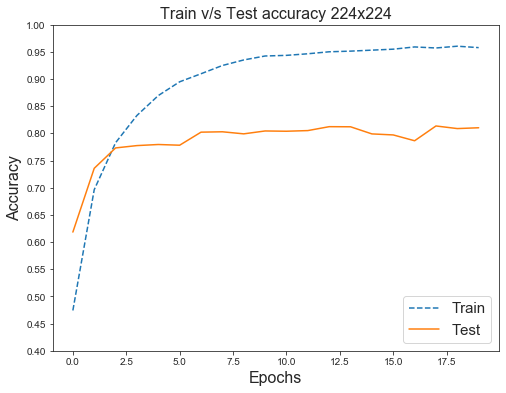

In [27]:
fig = plt.figure(figsize = (8, 6))
plt.plot(range(len(data.epoch.unique())), data[data.run == best_run]['train_accuracy'], label = 'Train', linestyle = '--')
plt.plot(range(len(data.epoch.unique())), data[data.run == best_run]['test_accuracy'], label = 'Test')
plt.title('Train v/s Test accuracy 224x224', fontsize = 16)
# plt.title('Train v/s Test accuracy 32x32 ; With pretrained weights', fontsize = 16)
plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 15)
plt.yticks(np.linspace(0.4, 1.0, 13))
plt.show()
fig.savefig('1.1 train_test_224.png', bbox_inches = 'tight')

### Pick 1.2 csv results file for 32x32 or 224x224

In [4]:
# data = pd.read_csv("1.2_pretrain_large_32.csv")
data = pd.read_csv("1.2_pretrain_large_224.csv")

In [5]:
data['overfit%'] = 100*(data['train_accuracy'] - data['test_accuracy'])
data['overfit%'] = data['overfit%'].apply(lambda x: max(x, 0))

data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head(5)

,run,epoch,loss,train_accuracy,epoch duration,run duration,test_accuracy,total parameters,lr,batch_size,momentum,weight_decay,pretrained,overfit%
0,1,1,1.005740,0.70160,453.707815,457.369353,0.8538,11181642,0.0001,32,0.9,0.001,"[True, 'all']",0.000
1,1,2,0.418908,0.87234,458.748741,950.821456,0.8985,11181642,0.0001,32,0.9,0.001,"[True, 'all']",0.000
2,1,3,0.303009,0.90624,459.479337,1445.136689,0.9135,11181642,0.0001,32,0.9,0.001,"[True, 'all']",0.000
3,1,4,0.244640,0.92450,464.050488,1943.959180,0.9198,11181642,0.0001,32,0.9,0.001,"[True, 'all']",0.470
4,1,5,0.204599,0.93636,461.262030,2441.317239,0.9246,11181642,0.0001,32,0.9,0.001,"[True, 'all']",1.176


In [6]:
print('Time taken for execution (mins):', data[data.epoch == max(data.epoch)]['run duration'].sum()/60)

Time taken for execution (mins): 251.4466058


### Best configuration

In [7]:
data.iloc[data[data.test_accuracy  == max(data.test_accuracy)].index, :][['run', 'epoch', 'loss', 'train_accuracy', 'test_accuracy', 'lr', 'weight_decay', 'pretrained', 'overfit%']]

,run,epoch,loss,train_accuracy,test_accuracy,lr,weight_decay,pretrained,overfit%
23,2,9,0.002082,1.0,0.9503,0.001,0.001,"[True, 'all']",4.97


In [8]:
best_run = data[data.test_accuracy == max(data.test_accuracy)].run.values[0]

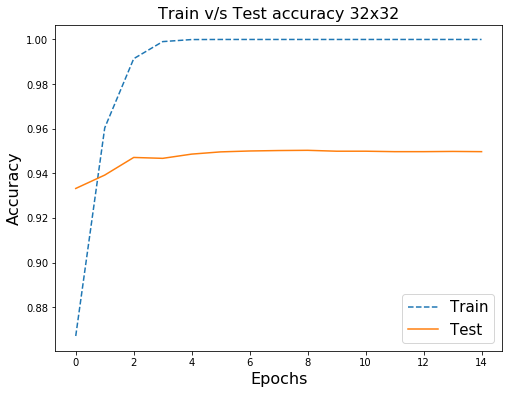

In [9]:
fig = plt.figure(figsize = (8, 6))
plt.plot(range(len(data.epoch.unique())), data[data.run == best_run]['train_accuracy'], label = 'Train', linestyle = '--')
plt.plot(range(len(data.epoch.unique())), data[data.run == best_run]['test_accuracy'], label = 'Test')
plt.title('Train v/s Test accuracy 32x32', fontsize = 16)
# plt.title('Train v/s Test accuracy 224x224', fontsize = 16)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 15)
# plt.yticks(np.linspace(0.4, 1.0, 13))
plt.show()
# fig.savefig('1.2 train_test_224.png', bbox_inches = 'tight')
# fig.savefig('1.2 train_test_32.png', bbox_inches = 'tight')

In [90]:
print('Number of epochs:', len(data.epoch.unique()))
print('Learning rates tried:', data.lr.unique())
print('Weight decays tried:', data.weight_decay.unique())
print('Batch size tried:', data.batch_size.unique())
print('Pretrained weights settings tried:', data.pretrained.unique())

Number of epochs: 15
Learning rates tried: [0.0001 0.001 ]
Weight decays tried: [0.001]
Batch size tried: [32]
Pretrained weights settings tried: ["[True, 'all']"]


### Effect of pretrained weights

In [91]:
wd_data = data.groupby(['pretrained'])['loss', 'train_accuracy', 'test_accuracy', 'overfit%'].mean()

try: wd_data = wd_data.iloc[[0, 3, 2, 1], :]
except: pass

(wd_data.style.
# background_gradient(subset='overfit%', cmap='Blues').
background_gradient(subset='test_accuracy', cmap='Blues'))

,loss,train_accuracy,test_accuracy,overfit%
pretrained,,,,
"[True, 'all']",0.124117,0.964587,0.935457,3.75227


### Effect of weight decay

In [92]:
wd_data = data.groupby(['weight_decay'])['loss', 'train_accuracy', 'test_accuracy', 'overfit%'].mean()

(wd_data.style.
background_gradient(subset='overfit%', cmap='Blues'))

,loss,train_accuracy,test_accuracy,overfit%
weight_decay,,,,
0.001,0.124117,0.964587,0.935457,3.75227


### Effect of lr on fine-tuning

In [93]:
lr_data = data.groupby(['lr'])['loss', 'train_accuracy', 'test_accuracy', 'overfit%'].mean()

(lr_data.style.
background_gradient(subset='test_accuracy', cmap='Blues'))

,loss,train_accuracy,test_accuracy,overfit%
lr,,,,
0.0001,0.207009,0.941321,0.92334,3.0356
0.001,0.0412242,0.987853,0.947573,4.46893


### Effect of weight decay and learning rate

In [95]:
wd_lr_data = data.groupby(['lr', 'weight_decay'])['loss', 'train_accuracy', 'test_accuracy', 'overfit%'].mean()
(wd_lr_data.style.
background_gradient(subset='test_accuracy', cmap='Blues'))
# background_gradient(subset='loss', cmap='YlGn'))

,,loss,train_accuracy,test_accuracy,overfit%
lr,weight_decay,,,,
0.0001,0.001,0.207009,0.941321,0.92334,3.0356
0.001,0.001,0.0412242,0.987853,0.947573,4.46893


In [96]:
wd_lr_data = data.groupby(['weight_decay', 'lr'])['loss', 'train_accuracy', 'test_accuracy', 'overfit%'].mean()


(wd_lr_data.style.
background_gradient(subset='test_accuracy', cmap='Blues').
background_gradient(subset='loss', cmap='YlGn'))

### Effect of pretrained weights and learning rate

In [97]:
wd_lr_data = data.groupby(['pretrained', 'lr'])['loss', 'train_accuracy', 'test_accuracy', 'overfit%'].mean()

(wd_lr_data.style.
background_gradient(subset='test_accuracy', cmap='Blues'))
# background_gradient(subset='loss', cmap='YlGn'))

### Pick 2.1 csv results file for 32x32 (3 types of augmentations)

In [17]:
aug1 = pd.read_csv('2.1_No_pretrain_32_tiny_aug_1.csv')
aug2 = pd.read_csv('2.1_No_pretrain_32_tiny_aug_2.csv')
aug3 = pd.read_csv('2.1_No_pretrain_32_tiny_aug_3.csv')
aug1.drop(['Unnamed: 0'], axis = 1, inplace = True)
aug2.drop(['Unnamed: 0'], axis = 1, inplace = True)
aug3.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [18]:
aug1['Type'] = 'aug1'
aug2['Type'] = 'aug2'
aug3['Type'] = 'aug3'

In [19]:
all_aug = pd.concat([aug1, aug2, aug3])

In [20]:
aug1['test_accuracy'].agg(['mean', 'max'])

mean    0.485316
max     0.556100
Name: test_accuracy, dtype: float64

In [21]:
aug2['test_accuracy'].agg(['mean', 'max'])

mean    0.392362
max     0.437400
Name: test_accuracy, dtype: float64

In [22]:
aug3['test_accuracy'].agg(['mean', 'max'])

mean    0.37953
max     0.43300
Name: test_accuracy, dtype: float64

In [16]:
best_run = all_aug[all_aug.test_accuracy == max(all_aug.test_accuracy)].run.values[0]
all_aug[all_aug.test_accuracy == max(all_aug.test_accuracy)]

,Unnamed: 0,run,epoch,loss,train_accuracy,epoch duration,run duration,test_accuracy,total parameters,lr,batch_size,momentum,weight_decay,pretrained,Type
79,79,1,80,0.044862,0.9986,10.418137,1062.634899,0.5561,11181642,0.01,32,0.9,0.01,[False],aug1


In [23]:
len(aug1.epoch.unique())

80

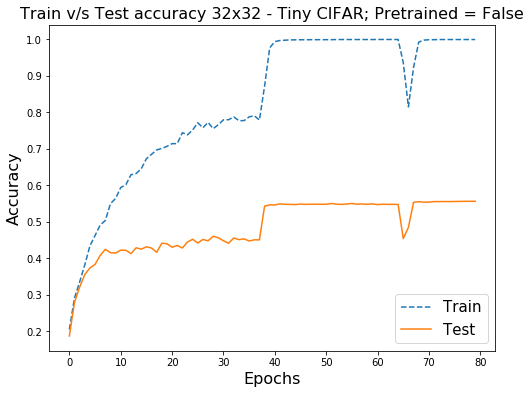

In [24]:
fig = plt.figure(figsize = (8, 6))
plt.plot(range(len(aug1.epoch.unique())), aug1[aug1.run == best_run]['train_accuracy'], label = 'Train', linestyle = '--')
plt.plot(range(len(aug1.epoch.unique())), aug1[aug1.run == best_run]['test_accuracy'], label = 'Test')
plt.title('Train v/s Test accuracy 32x32 - Tiny CIFAR; Pretrained = False', fontsize = 16)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 15)
# plt.yticks(np.linspace(0.4, 1.0, 13))
plt.show()
# fig.savefig('1.2 train_test_224.png', bbox_inches = 'tight')
fig.savefig('2.1 train_test_32.png', bbox_inches = 'tight')

In [27]:
wd_lr_data = all_aug.groupby(['Type'])['train_accuracy', 'test_accuracy'].agg(['mean', 'max'])

(wd_lr_data.style.
background_gradient(subset='test_accuracy', cmap='Blues'))
# background_gradient(subset='loss', cmap='YlGn'))

### Pick 2.1 and 2.2 csv results file for 224x224

In [57]:
data = pd.read_csv('2.1_2.2_tiny_224_aug.csv')

In [58]:
data['overfit%'] = 100*(data['train_accuracy'] - data['test_accuracy'])
data['overfit%'] = data['overfit%'].apply(lambda x: max(x, 0))

data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head(5)

,run,epoch,loss,train_accuracy,epoch duration,run duration,test_accuracy,total parameters,lr,batch_size,momentum,weight_decay,pretrained,overfit%
0,1,1,2.174673,0.1970,39.733566,43.301188,0.1036,11181642,0.01,64,0.9,0.005,[False],9.34
1,1,2,2.128704,0.2732,39.552495,116.723453,0.1673,11181642,0.01,64,0.9,0.005,[False],10.59
2,1,3,1.881196,0.3378,39.491713,189.923020,0.2072,11181642,0.01,64,0.9,0.005,[False],13.06
3,1,4,1.769763,0.3788,39.458410,263.231904,0.2768,11181642,0.01,64,0.9,0.005,[False],10.20
4,1,5,1.607251,0.4278,39.546152,336.851931,0.3321,11181642,0.01,64,0.9,0.005,[False],9.57


In [59]:
print('Time taken for execution (mins):', data[data.epoch == max(data.epoch)]['run duration'].sum()/60)

Time taken for execution (mins): 365.73129109999996


In [60]:
print('Number of epochs:', len(data.epoch.unique()))
print('Learning rates tried:', data.lr.unique())
print('Weight decays tried:', data.weight_decay.unique())
print('Batch size tried:', data.batch_size.unique())
print('Pretrained weights settings tried:', data.pretrained.unique())

Number of epochs: 80
Learning rates tried: [0.01  0.001]
Weight decays tried: [0.005  0.001  0.0005]
Batch size tried: [64]
Pretrained weights settings tried: ['[False]' "[True, 'all']" '[True, 40]']


### Best configuration for pretrained = False

In [61]:
data.pretrained.unique()

array(['[False]', "[True, 'all']", '[True, 40]'], dtype=object)

In [62]:
no_pretrain_data = data[data.pretrained == '[False]']

In [63]:
no_pretrain_data.iloc[no_pretrain_data[no_pretrain_data.test_accuracy  == max(no_pretrain_data.test_accuracy)].index, :][['run', 'epoch', 'loss', 'train_accuracy', 'test_accuracy', 'lr', 'weight_decay', 'pretrained', 'overfit%']]

,run,epoch,loss,train_accuracy,test_accuracy,lr,weight_decay,pretrained,overfit%
24,1,25,0.013943,1.0,0.598,0.01,0.005,[False],40.2


In [64]:
best_run =no_pretrain_data[no_pretrain_data.test_accuracy == max(no_pretrain_data.test_accuracy)].run.values[0]

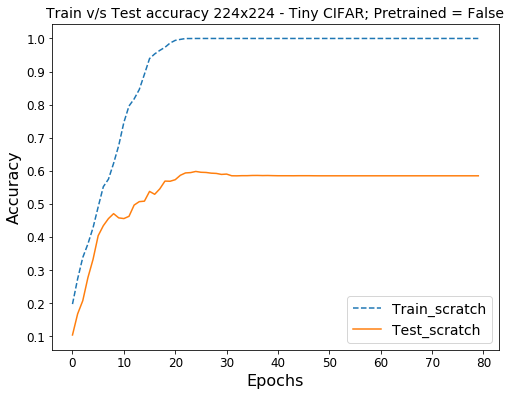

In [106]:
fig = plt.figure(figsize = (8, 6))
plt.plot(range(len(no_pretrain_data.epoch.unique())), no_pretrain_data[no_pretrain_data.run == best_run]['train_accuracy'], label = 'Train_scratch', linestyle = '--')
plt.plot(range(len(no_pretrain_data.epoch.unique())), no_pretrain_data[no_pretrain_data.run == best_run]['test_accuracy'], label = 'Test_scratch')
plt.title('Train v/s Test accuracy 224x224 - Tiny CIFAR; Pretrained = False', fontsize = 14)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(np.linspace(0.1, 1.0, 10), fontsize = 12)
plt.show()
fig.savefig('2.1 train_test_224.png', bbox_inches = 'tight')

### Best configuration for pretrained = True

In [66]:
data.iloc[data[data.test_accuracy  == max(data.test_accuracy)].index, :][['run', 'epoch', 'loss', 'train_accuracy', 'test_accuracy', 'lr', 'weight_decay', 'pretrained', 'overfit%']].head(1)

,run,epoch,loss,train_accuracy,test_accuracy,lr,weight_decay,pretrained,overfit%
101,2,22,0.005633,1.0,0.8985,0.01,0.005,"[True, 'all']",10.15


In [67]:
best_run_2 = data[data.test_accuracy == max(data.test_accuracy)].run.values[0]

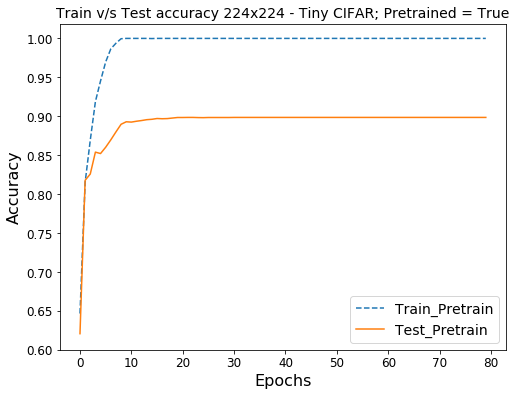

In [107]:
fig = plt.figure(figsize = (8, 6))

plt.plot(range(len(data.epoch.unique())), data[data.run == best_run_2]['train_accuracy'], label = 'Train_Pretrain', linestyle = '--')
plt.plot(range(len(data.epoch.unique())), data[data.run == best_run_2]['test_accuracy'], label = 'Test_Pretrain')

plt.title('Train v/s Test accuracy 224x224 - Tiny CIFAR; Pretrained = True', fontsize = 14)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 14)
plt.yticks(np.linspace(0.6, 1.0, 9), fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()
fig.savefig('2.2 train_test_224.png', bbox_inches = 'tight')

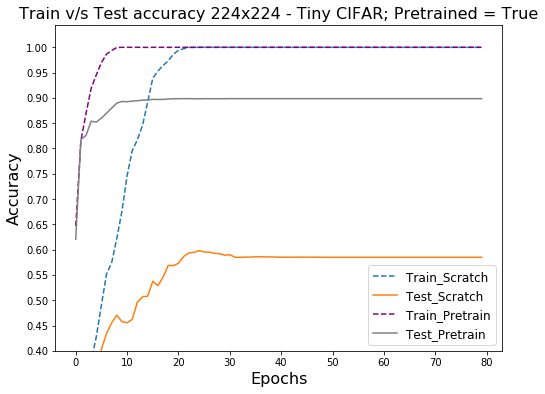

In [87]:
fig = plt.figure(figsize = (8, 6))
plt.plot(range(len(no_pretrain_data.epoch.unique())), no_pretrain_data[no_pretrain_data.run == best_run]['train_accuracy'], label = 'Train_Scratch', linestyle = '--')
plt.plot(range(len(no_pretrain_data.epoch.unique())), no_pretrain_data[no_pretrain_data.run == best_run]['test_accuracy'], label = 'Test_Scratch')

plt.plot(range(len(data.epoch.unique())), data[data.run == best_run_2]['train_accuracy'], label = 'Train_Pretrain', linestyle = '--', color = 'purple')
plt.plot(range(len(data.epoch.unique())), data[data.run == best_run_2]['test_accuracy'], label = 'Test_Pretrain', color = 'grey')

plt.title('Train v/s Test accuracy 224x224 - Tiny CIFAR; Pretrained = True', fontsize = 16)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 12)
plt.yticks(np.linspace(0.4, 1.0, 13))
plt.ylim(0.4)
plt.show()
# fig.savefig('2.2 train_test_224.png', bbox_inches = 'tight')

### Effect of pretrained weights

In [113]:
wd_data = data.groupby(['pretrained'])['train_accuracy', 'test_accuracy', 'overfit%'].agg(['mean', 'max'])

try: wd_data = wd_data.iloc[[0, 2, 1], :]
except: pass

(wd_data.style.
# background_gradient(subset='overfit%', cmap='Blues').
background_gradient(subset='test_accuracy', cmap='Blues'))

### Pick 2.3 csv results file for 224x224 (Dropout)

In [118]:
data = pd.read_csv('2.3_tiny_224_DO.csv')

In [119]:
data['overfit%'] = 100*(data['train_accuracy'] - data['test_accuracy'])
data['overfit%'] = data['overfit%'].apply(lambda x: max(x, 0))

data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head(5)

,run,epoch,loss,train_accuracy,epoch duration,run duration,test_accuracy,total parameters,lr,batch_size,momentum,weight_decay,p,num_drop_layers,pretrained,overfit%
0,1,1,1.297954,0.5774,42.434582,46.075252,0.7578,11181642,0.001,32,0.9,0.001,0.1,1,"[True, 'all']",0.00
1,1,2,0.681963,0.7584,40.871347,121.359242,0.6294,11181642,0.001,32,0.9,0.001,0.1,1,"[True, 'all']",12.90
2,1,3,0.419680,0.8498,40.915749,194.984578,0.7816,11181642,0.001,32,0.9,0.001,0.1,1,"[True, 'all']",6.82
3,1,4,0.319178,0.8866,40.759831,268.770158,0.8128,11181642,0.001,32,0.9,0.001,0.1,1,"[True, 'all']",7.38
4,1,5,0.197361,0.9306,40.968185,342.926343,0.8176,11181642,0.001,32,0.9,0.001,0.1,1,"[True, 'all']",11.30


In [120]:
print('Time taken for execution (mins):', data[data.epoch == max(data.epoch)]['run duration'].sum()/60)

Time taken for execution (mins): 1135.2133263333337


In [121]:
print('Number of epochs:', len(data.epoch.unique()))
print('Learning rates tried:', data.lr.unique())
print('Weight decays tried:', data.weight_decay.unique())
print('Batch size tried:', data.batch_size.unique())
print('Pretrained weights settings tried:', data.pretrained.unique())
print('Number of dropout layers:', data.num_drop_layers.unique())
print('Dropout rate:', data.p.unique())

Number of epochs: 30
Learning rates tried: [0.001]
Weight decays tried: [0.001]
Batch size tried: [32]
Pretrained weights settings tried: ["[True, 'all']" '[False]']
Number of dropout layers: [1 2 3 4 5]
Dropout rate: [0.1 0.2 0.3]


In [129]:
data[data.test_accuracy == max(data.test_accuracy)][['run', 'epoch', 'loss', 'train_accuracy', 'test_accuracy', 'p', 'num_drop_layers', 'pretrained', 'overfit%']]

,run,epoch,loss,train_accuracy,test_accuracy,p,num_drop_layers,pretrained,overfit%
54,2,25,0.00029,1.0,0.9056,0.1,2,"[True, 'all']",9.44


In [130]:
best_run = data[data.test_accuracy == max(data.test_accuracy)].run.values[0]

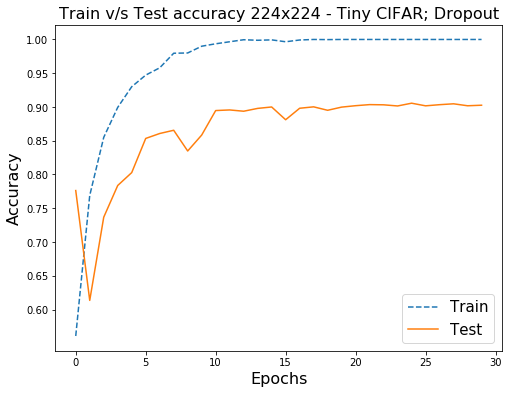

In [131]:
fig = plt.figure(figsize = (8, 6))
plt.plot(range(len(data.epoch.unique())), data[data.run == best_run]['train_accuracy'], label = 'Train', linestyle = '--')
plt.plot(range(len(data.epoch.unique())), data[data.run == best_run]['test_accuracy'], label = 'Test')
plt.title('Train v/s Test accuracy 224x224 - Tiny CIFAR; Dropout', fontsize = 16)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 15)
plt.yticks(np.linspace(0.6, 1.0, 9))
plt.show()
fig.savefig('2.3 train_test_224.png', bbox_inches = 'tight')

### Effect of pretrained weights

In [132]:
wd_data = data.groupby(['pretrained'])['train_accuracy', 'test_accuracy', 'overfit%'].agg(['mean', 'max'])

try: wd_data = wd_data.iloc[[0, 2, 1], :]
except: pass

(wd_data.style.
# background_gradient(subset='overfit%', cmap='Blues').
background_gradient(subset='test_accuracy', cmap='Blues'))

In [133]:
wd_data = data.groupby(['pretrained', 'num_drop_layers'])['train_accuracy', 'test_accuracy', 'overfit%'].mean()
(wd_data.style.
background_gradient(subset='overfit%', cmap='YlGn').
background_gradient(subset='test_accuracy', cmap='Blues'))

### Effect of dropout rate

In [134]:
wd_data = data[data.pretrained == "[True, 'all']"].groupby(['p'])['train_accuracy', 'test_accuracy', 'overfit%'].agg(['mean', 'max'])

(wd_data.style.
# background_gradient(subset='overfit%', cmap='Blues').
background_gradient(subset='test_accuracy', cmap='Blues'))

### Effect of number of dropout layers

In [216]:
wd_data = data[data.pretrained == "[True, 'all']"].groupby(['num_drop_layers'])['train_accuracy', 'test_accuracy', 'overfit%'].mean()
(wd_data.style.
# background_gradient(subset='overfit%', cmap='YlGn').
background_gradient(subset='test_accuracy', cmap='Blues'))

,train_accuracy,test_accuracy,overfit%
num_drop_layers,,,
1,0.958789,0.863848,10.2064
2,0.957478,0.862017,10.2388
3,0.950647,0.851899,10.6506
4,0.944433,0.844872,10.6783
5,0.936007,0.831844,11.0614


In [217]:
wd_data = data[data.pretrained == "[True, 'all']"].groupby(['num_drop_layers', 'p'])['train_accuracy', 'test_accuracy', 'overfit%'].mean()
(wd_data.style.
# background_gradient(subset='overfit%', cmap='YlGn').
background_gradient(subset='test_accuracy', cmap='Blues'))